In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

2021-12-16 19:05:00.334682: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-16 19:05:00.334726: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load and Subset Data

<Item title:"SAC_Monthly_Maintenance_Assessment" type:Feature Layer Collection owner:Anooshi>
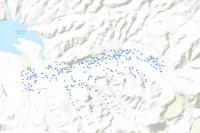

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('54304c0ed9eb4e81b73449b1de6d1b74')
data = output['data0']
feature_service = output['feature_service']

In [0]:
# Subset data for desired year.
# Check entries against ArcGIS
data.rename(columns={"Date": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)

# QAQC

In [4]:
# column header names
data.columns

Index(['OBJECTID', 'HabitatStructure', 'NNIP', 'HabitatSuitability',
       'InvasiveAnimals', 'Erosion', 'Infrastructure', 'NativePlants',
       'Stressors', 'ManagementActionRequired', 'Observation_Date', 'Observer',
       'ManagementIssueResolved', 'GlobalID', 'CreationDate', 'Creator',
       'EditDate', 'Editor', 'TreeSurvival', 'Habitat', 'Comments',
       'Management_Comments', 'Monthly_Topic_Comments', 'SHAPE'],
      dtype='object')

In [4]:
def validate_domains(feature_service):
    """Compares data against domains and displays data entries that are not within the domain. It checks all tables and layers
    INPUT: feature service
    OUTPUT: Displays mismatches"""
    pd.set_option('display.max_colwidth', 0)
    
    def compare(layersTables):
    
        for lt in layersTables: #Loop through each table or layer
            print('\n\nTable/Layer: ',lt.properties.name )

            found = False #Flag to track if a mismatch is found
            
            results = pd.DataFrame(columns=['Field','Data'])
            if lt.query(return_count_only=True) > 0: #If there are any records
                
                data = lt.query().sdf #Convert data to pandas dataframe
                for field in lt.properties.fields:    #Loop through fields

                    if field.domain:         #If domain exists
                        domain_codes = set()   #Make set of coded domain values
                        for entry in field.domain.codedValues:
                            domain_codes.add(entry.code)
                        domain_codes.add(None) #Adds None as an option so that blank entries are ignored

                        records = set(data[field.name]) #Make set of data
                        result = records - domain_codes #subtract sets to find the records that are not in domain.
                        
                        if result:#If mismatch, add to results dataframe
                            result_df = pd.DataFrame({'Field': [field.name], 'Data': [result]})
                            results = results.append(result_df)
                            found = True
                
                if found: #If there were mismatches, display results dataframe
                    print('The following entries are not within the domain:')
                    display(results)
                else:
                    print('No Mismatches Found')
            else:
                print('No records/features\n')
                            
    compare(feature_service.tables)#do comparison for tables
    compare(feature_service.layers)#do comparison for layers

In [5]:
validate_domains(feature_service)



Table/Layer:  SAC_Monthly_Maintenance_Assessment


The following entries are not within the domain:


,Field,Data
0,HabitatStructure,"{nan, nan, nan, nan, nan, nan, nan, nan, nan}"
0,NNIP,"{nan, nan, nan, nan, nan, nan, nan, nan}"
0,HabitatSuitability,"{nan, nan, nan, nan, nan, nan}"
0,InvasiveAnimals,"{nan, nan, nan, nan, nan}"
0,Erosion,"{nan, nan, nan, nan, nan, nan}"
0,Infrastructure,"{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, ...}"
0,NativePlants,"{nan, nan, nan, nan, nan, nan, nan}"
0,Stressors,"{nan, nan, nan, nan, nan, nan, nan, nan, nan}"
0,Observer,"{Ryan Swanson, Jackson Sabol, Janel Mayo, Richard Graham-Bruno, Joy Stewart}"
0,TreeSurvival,"{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, ...}"


In [7]:
QAQC_whitespace(data, exclude_cols=['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: Management_Comments
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Monthly_Topic_Comments
No \xa0 characters found
No double spaces found
No triple spaces found
Trailing white space found


,OBJECTID,Monthly_Topic_Comments
669,808,No upland oak recruits were observed
676,815,No oak recruits observed
677,816,No oak recruits are detected
678,817,No oak recruits observed.
680,819,1 QULO recruit observed
682,821,"Topic is surface flow after recent rain event. One adult rainbow trout with visible exterior fungal pathogen load was observed swimming in a deep, shaded pool. The pool depth was estimated at roughly 3 feet. The trout likely swam upstream from San Antonio Reservoir during the period of continuous stream flow during or immediately following recent heavy rains. If true, this would indicate absence of fish passage barriers. It is possible that the trout may have persisted in a remnant pool in La Costa Creek or SAC upstream of the CE boundary. The trout’s pathogen load may eventually cause mortality."
683,822,post storm surface water flow starts upstream of the CE boundary and is about 3in deep. The area consists of riffles and glides. Bobcat tracks observed
684,823,"Shallow riffle, mild water breaks over gravel. 1 pacific tree frog observed"
685,824,.28cfs- water flow and 65.7F mean temp under the bridge.




Analysis for: ManagementActionRequired
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Creator
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Habitat
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Editor
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Observer
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: ManagementIssueResolved
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


In [7]:
find_blank_entries(sub, exclude_cols = [ 'Habitat','Infrastructure', 'Editor', 'TreeSurvival','ManagementIssueResolved','CreationDate', 'Creator','EditDate','Monthly_Topic_Comments','Management_Comments'])

No blank OBJECTID
No blank Observation_Date
No blank Erosion
Blank Stressors entrie(s) exist!


,OBJECTID,HabitatStructure,NNIP,HabitatSuitability,InvasiveAnimals,Erosion,Infrastructure,NativePlants,Stressors,ManagementActionRequired,Observation_Date,Observer,ManagementIssueResolved,GlobalID,CreationDate,Creator,EditDate,Editor,TreeSurvival,Habitat,Comments,Management_Comments,Monthly_Topic_Comments,SHAPE
669,808,2.0,4.0,2.0,4.0,3.0,4.0,2.0,NaN,None,2021-09-28 16:36:56,Niel Gapal,None,e14dd175-6ef4-4c7f-ac35-4cb008ffc655,NaT,None,NaT,None,NaN,Oak Savannah,The herbaceous layer has been heavily grazed by cattle and a coupl...,None,No upland oak recruits were observed,"{""x"": 6184820.664927086, ""y"": 2035977.7160372087, ""spatialReferenc..."


No blank NativePlants
Blank Comments entrie(s) exist!


,OBJECTID,HabitatStructure,NNIP,HabitatSuitability,InvasiveAnimals,Erosion,Infrastructure,NativePlants,Stressors,ManagementActionRequired,Observation_Date,Observer,ManagementIssueResolved,GlobalID,CreationDate,Creator,EditDate,Editor,TreeSurvival,Habitat,Comments,Management_Comments,Monthly_Topic_Comments,SHAPE
597,736,4.0,3.0,3.0,4.0,4.0,NaN,2.0,3.0,No,2020-11-25 18:37:55,Mizael Seminatore,None,1041b922-5107-4b0a-946e-964488977249,NaT,None,NaT,None,NaN,Oak Woodland,None,"Habitat structure is composed of tree layers, herbaceous, shrubber...",Both QUDO and QUAG co-dominate the canopy cover of the habitat. Bo...,"{""x"": 6189412.541964518, ""y"": 2036286.004231574, ""spatialReference..."


Blank ManagementActionRequired entrie(s) exist!


,OBJECTID,HabitatStructure,NNIP,HabitatSuitability,InvasiveAnimals,Erosion,Infrastructure,NativePlants,Stressors,ManagementActionRequired,Observation_Date,Observer,ManagementIssueResolved,GlobalID,CreationDate,Creator,EditDate,Editor,TreeSurvival,Habitat,Comments,Management_Comments,Monthly_Topic_Comments,SHAPE
669,808,2.0,4.0,2.0,4.0,3.0,4.0,2.0,NaN,None,2021-09-28 16:36:56,Niel Gapal,None,e14dd175-6ef4-4c7f-ac35-4cb008ffc655,NaT,None,NaT,None,NaN,Oak Savannah,The herbaceous layer has been heavily grazed by cattle and a coupl...,None,No upland oak recruits were observed,"{""x"": 6184820.664927086, ""y"": 2035977.7160372087, ""spatialReferenc..."
670,809,2.0,3.0,2.0,4.0,3.0,NaN,2.0,2.0,None,2021-09-28 17:11:01,Silas Ellison,None,807a2a39-e4ed-4887-abad-0c9800db9e36,NaT,None,NaT,None,NaN,Oak Savannah,"Oak savanna. Habitat structure is moderately low, with three matur...",None,No oak recruits.,"{""x"": 6185335.227768708, ""y"": 2036371.1374453686, ""spatialReferenc..."
671,810,2.0,3.0,1.0,4.0,3.0,NaN,2.0,1.0,None,2021-09-28 17:29:49,Silas Ellison,None,536ce5f5-7d29-4a41-a4b7-f39a2e26deb4,NaT,None,NaT,None,NaN,Oak Savannah,"Oak savanna. Habitat structure is moderately low, with two mature ...",No oak recruits.,None,"{""x"": 6185764.268955513, ""y"": 2036515.869563292, ""spatialReference..."
672,811,2.0,4.0,3.0,4.0,3.0,NaN,2.0,3.0,None,2021-09-28 18:00:13,Silas Ellison,None,cee03166-f119-49f5-8814-84356e296820,NaT,None,NaT,None,NaN,Oak Savannah,"Oak savanna. Habitat structure is moderately low, with two mature ...",None,No oak recruits.,"{""x"": 6186808.890818454, ""y"": 2036817.827704811, ""spatialReference..."
673,812,1.0,4.0,3.0,4.0,3.0,NaN,1.0,3.0,None,2021-09-28 18:19:54,Silas Ellison,None,bea98430-b07b-42e6-801b-d69929dd0bf8,NaT,None,NaT,None,NaN,Oak Savannah,Oak savanna. Habitat structure is low because the only oak in the ...,None,No oak recruits.,"{""x"": 6187764.800120433, ""y"": 2036672.8458202207, ""spatialReferenc..."
674,813,2.0,3.0,3.0,4.0,3.0,NaN,1.0,2.0,None,2021-09-28 18:46:44,Silas Ellison,None,329c3b6e-27ed-4036-80cf-ef1b9c2b303d,NaT,None,NaT,None,NaN,Oak Savannah,"Oak savanna. Habitat structure is moderately low, with one mature ...",None,No oak recruits.,"{""x"": 6187857.920820068, ""y"": 2037523.5767775415, ""spatialReferenc..."
675,814,3.0,3.0,3.0,4.0,3.0,NaN,2.0,3.0,None,2021-09-28 19:33:17,Silas Ellison,None,0c1e99d9-73eb-43f1-b578-5c95664a6cd2,NaT,None,NaT,None,NaN,Oak Savannah,"Oak savanna. Habitat structure is moderate, with several mature bu...",None,"One QULO seedling. Northerly aspect, moderate slope.","{""x"": 6189502.633613447, ""y"": 2036971.6206593395, ""spatialReferenc..."
676,815,2.0,4.0,2.0,4.0,3.0,NaN,1.0,3.0,None,2021-09-28 17:35:07,Niel Gapal,None,26b7926a-572d-4c63-9a67-0bf12667bff7,NaT,None,NaT,None,NaN,Oak Savannah,Sparse herbaceous layer where the annual grasses have been heavily...,None,No oak recruits observed,"{""x"": 6185888.862611338, ""y"": 2036290.9477425069, ""spatialReferenc..."
677,816,2.0,4.0,2.0,4.0,3.0,NaN,1.0,2.0,None,2021-09-28 17:54:05,Niel Gapal,None,26334552-cfdd-4cd4-b2d9-58255d852490,NaT,None,NaT,None,NaN,Oak Savannah,3 mature QULO's with moderate canopy cover providing about 60% cov...,None,No oak recruits are detected,"{""x"": 6186561.872705261, ""y"": 2036575.0894268362, ""spatialReferenc..."
678,817,2.0,3.0,2.0,4.0,1.0,NaN,1.0,1.0,None,2021-09-28 18:16:26,Niel Gapal,None,b3a35544-5a57-46bc-90ff-baa88b9ee475,NaT,None,NaT,None,NaN,Oak Savannah,Moderate canopy cover from 2 QULOS and the herbaceous layer is com...,None,No oak recruits observed.,"{""x"": 6187134.205721715, ""y"": 2036741.4510898546, ""spatialReferenc..."


No blank Observer
No blank GlobalID
No blank HabitatStructure
Blank

 NNIP entrie(s) exist!


,OBJECTID,HabitatStructure,NNIP,HabitatSuitability,InvasiveAnimals,Erosion,Infrastructure,NativePlants,Stressors,ManagementActionRequired,Observation_Date,Observer,ManagementIssueResolved,GlobalID,CreationDate,Creator,EditDate,Editor,TreeSurvival,Habitat,Comments,Management_Comments,Monthly_Topic_Comments,SHAPE
647,786,1.0,NaN,1.0,4.0,4.0,NaN,2.0,2.0,No,2021-05-28 18:54:59,Kurt Lutz,None,8fac5d1c-9444-4821-b6e3-30646dbb45d9,NaT,None,NaT,None,2.0,Oak Woodland,Quercus canopy is non existent with the highest plant cover from 5...,None,Very few natives except for sparse SYNALB and some ARTDOU near the...,"{""x"": 6189148.051384548, ""y"": 2037950.8513013236, ""spatialReferenc..."


No blank

 SHAPE
No blank HabitatSuitability
No blank InvasiveAnimals


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


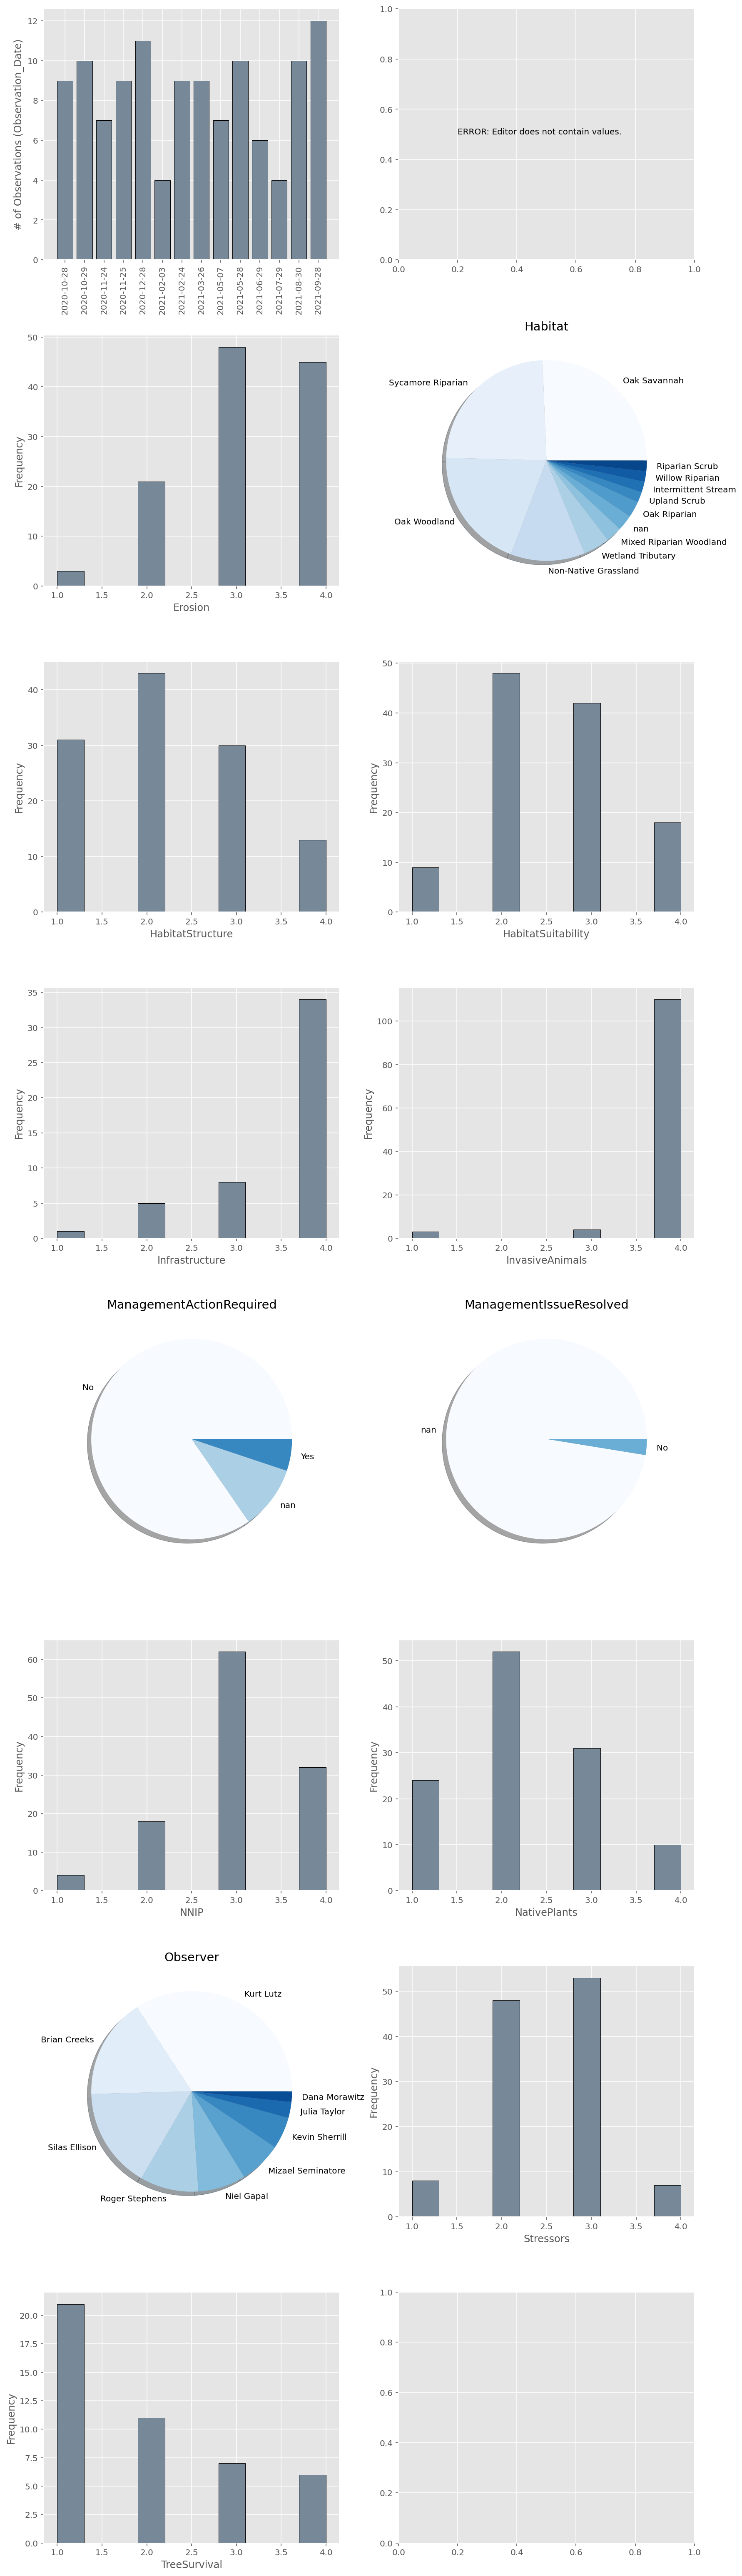

In [8]:
QAQC_plot(sub, ['Observation_Date', 'Editor', 'Erosion',
       'Habitat', 'HabitatStructure', 'HabitatSuitability',
       'Infrastructure', 'InvasiveAnimals', 'ManagementActionRequired',
       'ManagementIssueResolved', 'NNIP', 'NativePlants',
       'Observer', 'Stressors', 'TreeSurvival'])

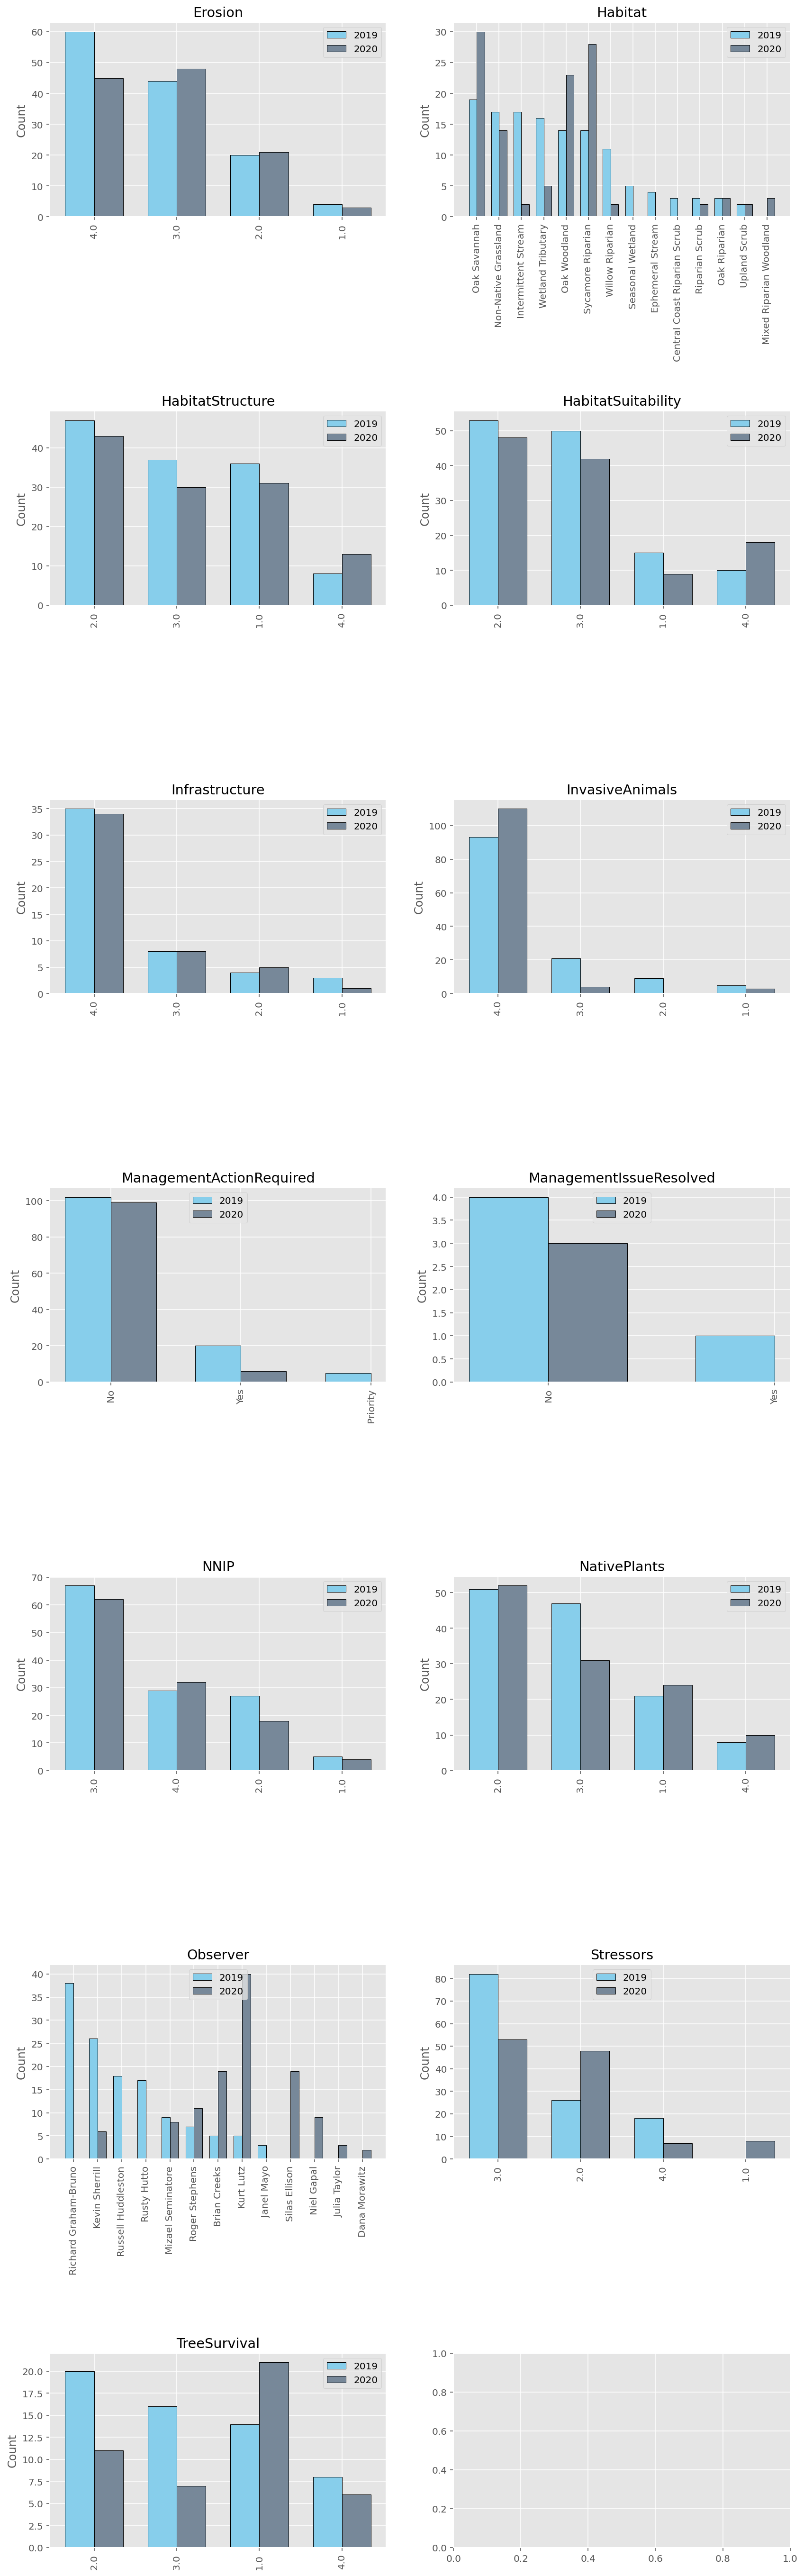

In [20]:
# compare categorical data between years
compare_years_catagorical(data, ['Erosion',
       'Habitat', 'HabitatStructure', 'HabitatSuitability',
       'Infrastructure', 'InvasiveAnimals', 'ManagementActionRequired',
       'ManagementIssueResolved', 'NNIP', 'NativePlants',
       'Observer', 'Stressors', 'TreeSurvival'], '2019', '2020')

Dropping surveyors with less than 5.8500000000000005 observations
They did not make over 5% of total observation
Dropping Surveyors: ['Julia Taylor' 'Dana Morawitz']


/tmp/ipykernel_4171/1264239889.py:1: RankWarning: Polyfit may be poorly conditioned
  compare_surveyors(sub, 'HabitatStructure', obs_var='Observer', drop=5)
/tmp/ipykernel_4171/1264239889.py:1: RankWarning: Polyfit may be poorly conditioned
  compare_surveyors(sub, 'HabitatStructure', obs_var='Observer', drop=5)
/tmp/ipykernel_4171/1264239889.py:1: RankWarning: Polyfit may be poorly conditioned
  compare_surveyors(sub, 'HabitatStructure', obs_var='Observer', drop=5)
/tmp/ipykernel_4171/1264239889.py:1: RankWarning: Polyfit may be poorly conditioned
  compare_surveyors(sub, 'HabitatStructure', obs_var='Observer', drop=5)
/tmp/ipykernel_4171/1264239889.py:1: RankWarning: Polyfit may be poorly conditioned
  compare_surveyors(sub, 'HabitatStructure', obs_var='Observer', drop=5)
/tmp/ipykernel_4171/1264239889.py:1: RankWarning: Polyfit may be poorly conditioned
  compare_surveyors(sub, 'HabitatStructure', obs_var='Observer', drop=5)
/tmp/ipykernel_4171/1264239889.py:1: RankWarning: Polyfit 

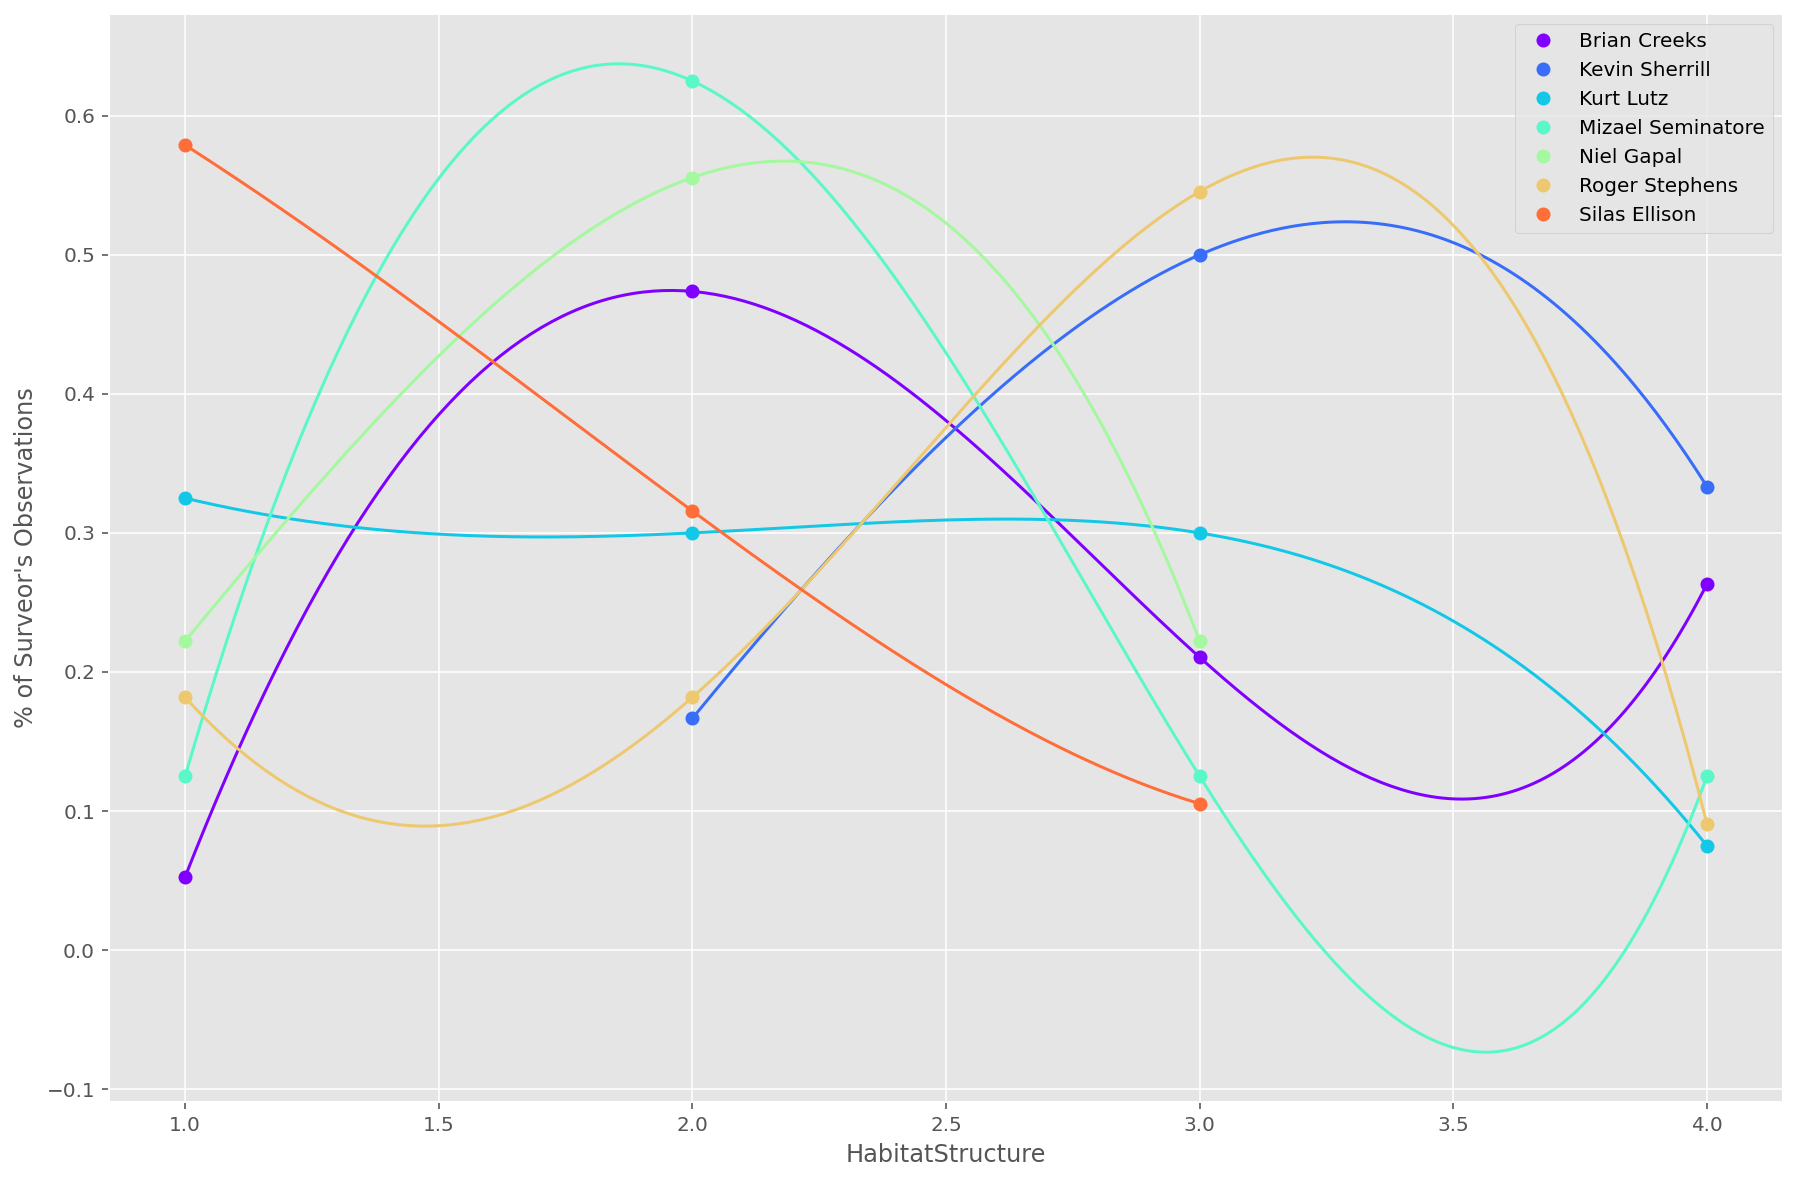

In [10]:
compare_surveyors(sub, 'HabitatStructure', obs_var='Observer', drop=5)

In [11]:
QAQC_attachment_filenames(feature_service)

Found mislabeled photo attachement(s):
SAC_Monthly_Maintenance_Assessment
Object ID: 34  Current Name:  SAC_MonthlyMaintenance_20171030_Generalplotphoto.jpg


Object ID: 554  Current Name:  attachment1.jpg
Object ID: 554  Current Name:  attachment2.jpg
Object ID: 554  Current Name:  attachment3.jpg
Object ID: 555  Current Name:  attachment1.jpg
Object ID: 555  Current Name:  attachment2.jpg
Object ID: 556  Current Name:  attachment1.jpg
Object ID: 556  Current Name:  attachment2.jpg


Object ID: 557  Current Name:  attachment1.jpg
Object ID: 557  Current Name:  attachment2.jpg
Object ID: 558  Current Name:  attachment1.jpg
Object ID: 558  Current Name:  attachment2.jpg
Object ID: 558  Current Name:  attachment3.jpg
Object ID: 559  Current Name:  attachment1.jpg
Object ID: 559  Current Name:  attachment2.jpg
Object ID: 559  Current Name:  attachment3.jpg


Object ID: 560  Current Name:  attachment1.jpg
Object ID: 560  Current Name:  attachment2.jpg
Object ID: 560  Current Name:  attachment3.jpg


Object ID: 561  Current Name:  attachment1.jpg
Object ID: 561  Current Name:  attachment2.jpg
Object ID: 562  Current Name:  attachment1.jpg
Object ID: 562  Current Name:  attachment2.jpg
Object ID: 563  Current Name:  attachment1.jpg
Object ID: 563  Current Name:  attachment2.jpg


Object ID: 564  Current Name:  attachment1.jpg
Object ID: 564  Current Name:  attachment2.jpg
Object ID: 565  Current Name:  attachment1.jpg
Object ID: 565  Current Name:  attachment2.jpg
Object ID: 566  Current Name:  attachment1.jpg
Object ID: 566  Current Name:  attachment2.jpg


Object ID: 567  Current Name:  attachment1.jpg
Object ID: 567  Current Name:  attachment2.jpg
Object ID: 567  Current Name:  attachment3.jpg
Object ID: 568  Current Name:  attachment1.jpg
Object ID: 568  Current Name:  attachment2.jpg
Object ID: 568  Current Name:  attachment3.jpg
Object ID: 568  Current Name:  attachment4.jpg
Object ID: 569  Current Name:  attachment1.jpg
Object ID: 569  Current Name:  attachment2.jpg


Object ID: 570  Current Name:  attachment1.jpg
Object ID: 570  Current Name:  attachment2.jpg
Object ID: 570  Current Name:  attachment3.jpg
Object ID: 571  Current Name:  attachment1.jpg


Object ID: 747  Current Name:  Photo 1.jpg


Object ID: 792  Current Name:  Photo 3.jpg
Object ID: 792  Current Name:  Photo 2.jpg
Object ID: 792  Current Name:  Photo 1.jpg
Object ID: 793  Current Name:  Photo 2.jpg
Object ID: 793  Current Name:  Photo 1.jpg
Object ID: 793  Current Name:  Photo 3.jpg


# Analysis

In [11]:
#Create year column
data['Year'] = data.Observation_Date.dt.year

In [12]:
sub['InvasiveAnimals'].value_counts(normalize=True) * 100

4.0    93.333333
3.0     3.809524
1.0     2.857143
Name: InvasiveAnimals, dtype: float64

In [13]:
sub['InvasiveAnimals'].mean()

3.876190476190476

In [14]:
management_count = sub.groupby('ManagementActionRequired').ManagementActionRequired.count()
management_pct = management_count / management_count.sum()

print('% of observations that need management:\n',management_pct)

print('Priority and Yes combined:',management_pct.Yes+management_pct.Priority)

% of observations that need management:
 ManagementActionRequired
No     0.942857
Yes    0.057143
Name: ManagementActionRequired, dtype: float64


AttributeError: 'Series' object has no attribute 'Priority'

In [0]:
suitability_count = sub.groupby('HabitatSuitability').HabitatSuitability.count()

suitability_pct = suitability_count / suitability_count.sum()

print('% of observations that are suitable for SSS:\n',suitability_pct)
print('3+4 combined:',suitability_pct[3] + suitability_pct[4])

In [15]:
data.groupby('Year').InvasiveAnimals.mean()

Year
2017    3.616279
2018    3.714286
2019    3.830882
2020    3.703947
2021    3.847458
Name: InvasiveAnimals, dtype: float64

In [16]:
(3.6565 - 3.83088) / 3.83088

-0.045519567305684384

In [17]:
data.groupby('Year').NativePlants.mean()

Year
2017    2.482353
2018    2.320346
2019    2.397059
2020    2.238411
2021    2.474576
Name: NativePlants, dtype: float64

In [18]:
(2.326531 - 2.397059) / 2.397059

-0.02942272176029039

In [19]:
data.groupby('Year').TreeSurvival.mean()

Year
2017    2.365385
2018    2.368852
2019    2.491228
2020    2.245614
2021    1.906250
Name: TreeSurvival, dtype: float64

In [20]:
(2.315789 - 2.491228)/2.491228

-0.07042269916683655

In [23]:
data.head()

,OBJECTID,HabitatStructure,NNIP,HabitatSuitability,InvasiveAnimals,Erosion,Infrastructure,NativePlants,Stressors,ManagementActionRequired,Observation_Date,Observer,ManagementIssueResolved,GlobalID,CreationDate,Creator,EditDate,Editor,TreeSurvival,Habitat,Comments,Management_Comments,Monthly_Topic_Comments,SHAPE
0,2,3.0,2.0,2.0,4.0,3.0,4.0,3.0,3.0,No,2017-10-30 17:09:36,Jared Lewis,None,9531d918-c048-40e7-92a4-fee92f85adc0,NaT,None,NaT,None,NaN,None,Observations of Poison Hemlock (COMA) beneath mature oaks. Some st...,None,None,"{""x"": 6182112.107985213, ""y"": 2036152.514626056, ""spatialReference..."
1,3,4.0,2.0,3.0,4.0,4.0,4.0,3.0,3.0,No,2017-10-30 17:15:00,Jared Lewis,None,4b8d106b-fd2a-4425-8e55-3e0e3b4013cb,NaT,None,NaT,None,3.0,None,Robust populations of native grasses along stream edge. Oak planti...,None,None,"{""x"": 6182191.597655639, ""y"": 2036300.6107865572, ""spatialReferenc..."
2,4,2.0,1.0,2.0,4.0,4.0,4.0,2.0,3.0,No,2017-10-30 17:30:59,Jared Lewis,Yes,acdab49b-0a01-4c13-a2ed-188df9f8c1ee,NaT,None,NaT,None,NaN,None,Dense population of poison hemlock. Should be targeted for managem...,None,None,"{""x"": 6182086.985988215, ""y"": 2036535.6933216453, ""spatialReferenc..."
3,5,4.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,No,2017-10-30 17:38:00,Jared Lewis,None,aeef7c74-24e5-4912-99ce-d56f078b7693,NaT,None,NaT,None,NaN,None,Diverse native vegetation cover. Limited impacts along stream edge...,None,None,"{""x"": 6181999.13773872, ""y"": 2036656.3420304805, ""spatialReference..."
4,6,3.0,2.0,2.0,4.0,3.0,4.0,2.0,2.0,Yes,2017-10-30 17:47:23,Jared Lewis,None,acf43d4b-8c15-4a53-8f05-0e4a966260d2,NaT,None,NaT,None,2.0,None,Large population of Italian thistle is crowding planted habitat; s...,None,None,"{""x"": 6181767.981704965, ""y"": 2036397.911116898, ""spatialReference..."


In [24]:
Field_order= ([
'Observation_Date',
'Observer',
'HabitatStructure', 
'NNIP', 
'HabitatSuitability',	
'InvasiveAnimals',
'Erosion', 
'Infrastructure', 
'NativePlants',
'Stressors',	
'TreeSurvival', 
'Habitat', 
'ManagementActionRequired',
'ManagementIssueResolved',
'Comments',
'Management_Comments', 
'Monthly_Topic_Comments', 
'OBJECTID',
'GlobalID',       
'SHAPE',
'CreationDate',
'Creator', 
'EditDate', 
'Editor', ])

In [25]:
export_data_deliverable(data, feature_service, Field_order, file_name="SAC_Monthly_Maintenance_Assessment")

No Related Table Found


Exported to Outputs/SAC_Monthly_Maintenance_Assessment_Data_20211014.xlsx
